In [1]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import algorithms as algos
from utils import generate_scenario, calculate_journey_distance

In [2]:
scenario_size = 100
num_nodes = 100

In [3]:
scenario = generate_scenario(num_nodes, scenario_size)

In [4]:
routes = [
    algos.greedy(scenario),
    algos.local_search(scenario),
    algos.local_search(scenario, initiate_greedy=False),
    algos.local_search(scenario, use_segment_flip=False),
]


In [5]:
def draw_result(scenario, route, scenario_size, image_size=500):
    image = Image.new('RGB', (image_size, image_size))
    draw = ImageDraw.Draw(image)
    
    drawing_scalar = image_size / scenario_size
    scaled_scenario = scenario * drawing_scalar
    
    route_in_xy = scaled_scenario[route + [route[0]]]
    
    for current, target in zip(route_in_xy[:-1], route_in_xy[1:]):
        draw.line([tuple(current), tuple(target)], fill=(0, 255, 0), width=3)
    
    r = 5
    for x, y in scaled_scenario:
        draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
    
    plt.figure(figsize=(15,15))
    plt.axis('off')
    plt.imshow(image)
    plt.show()

992.9355763277975


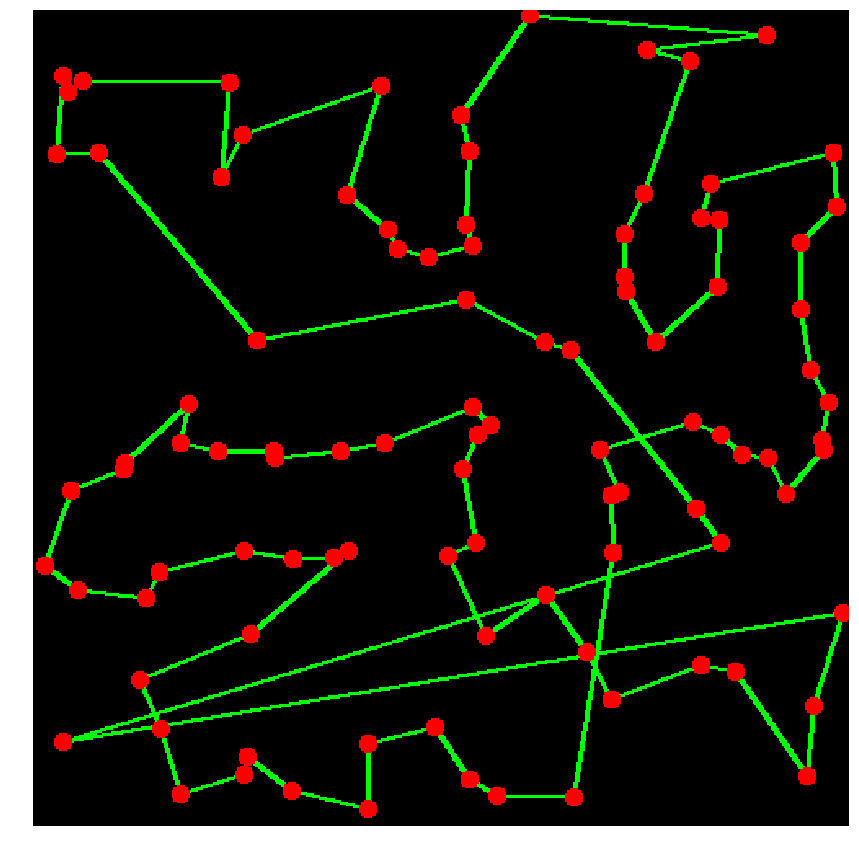

818.3236793201884


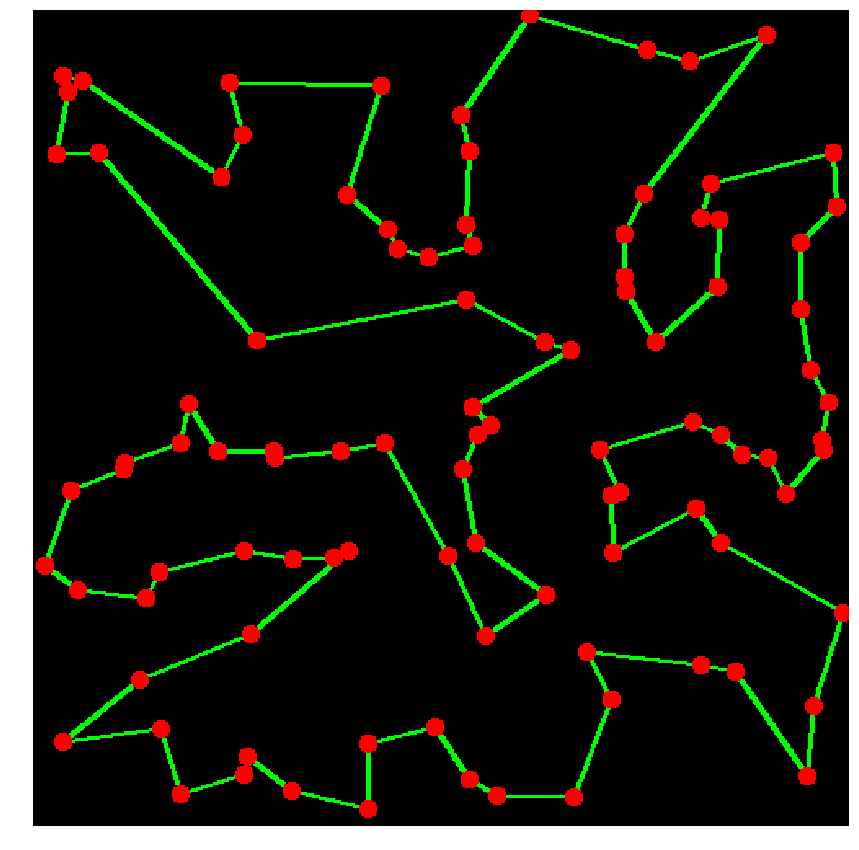

786.3723698658598


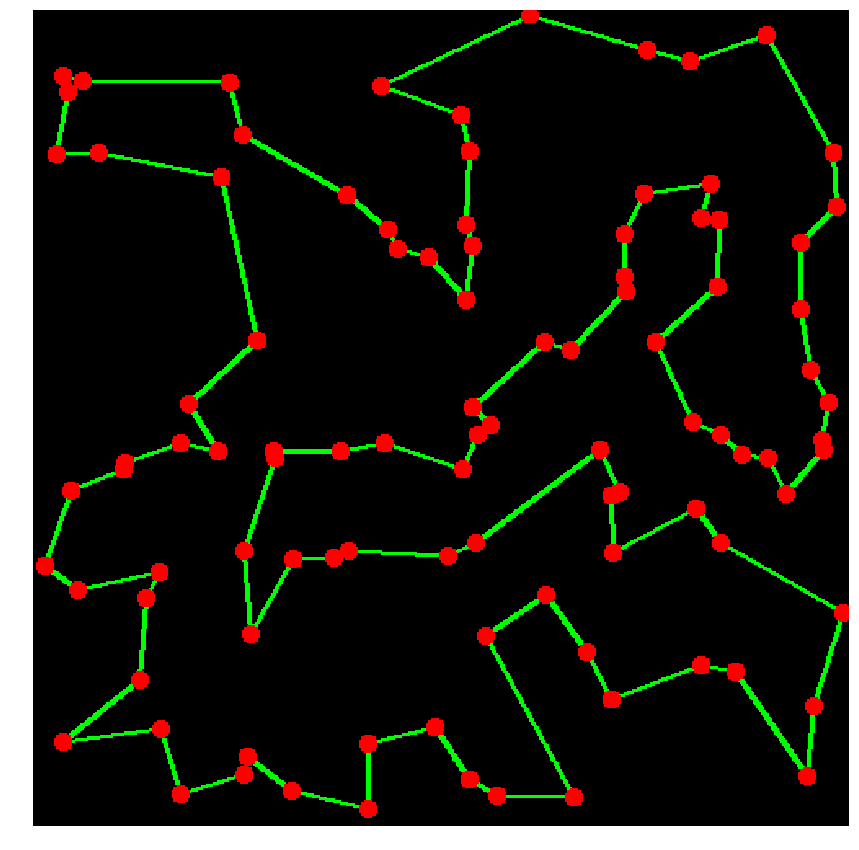

914.8753569831373


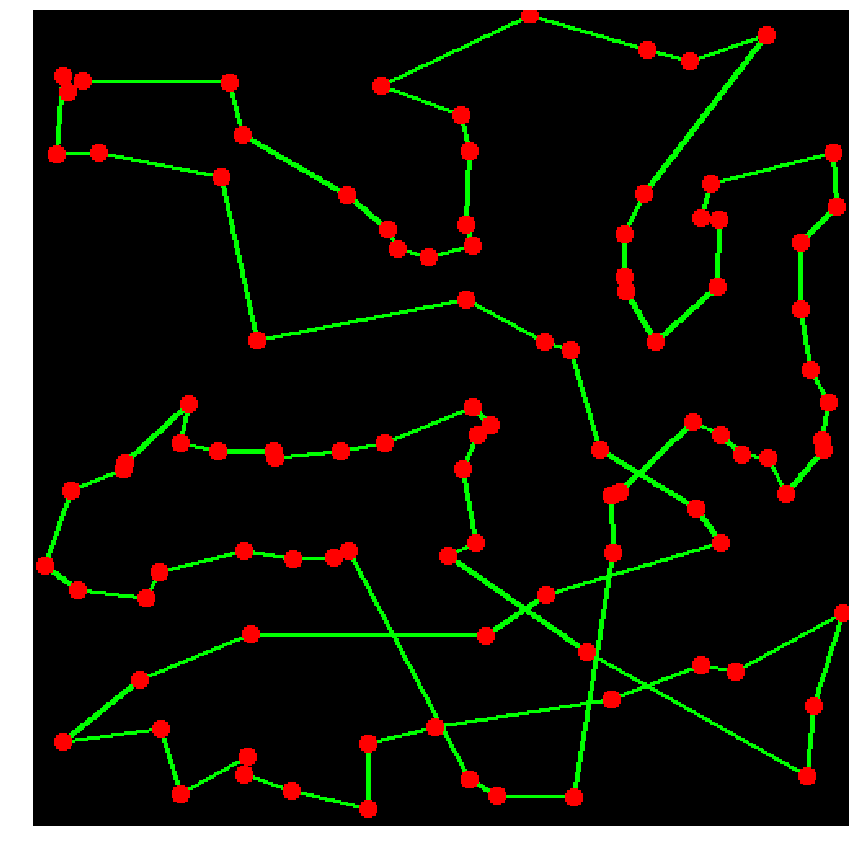

In [6]:
for route in routes:
    print(calculate_journey_distance(scenario[route]))
    draw_result(scenario, route, scenario_size)

In [7]:
def run_test(algorithms, num_scenarios, num_nodes):
    scenarios = [generate_scenario(num_nodes) for i in range(num_scenarios)]
    results = [
        [
            calculate_journey_distance(scenario[algorithm(scenario, **args)]) for scenario in scenarios
        ] for algorithm, args in algorithms
    ]
    average_scores = np.sum(results, axis=1) / num_scenarios
    print('average scores: ', average_scores)

In [8]:
run_test([[algos.local_search, {}], [algos.local_search, {'initiate_greedy': False}]], 5, 100)

average scores:  [792.11378804 804.67676223]
